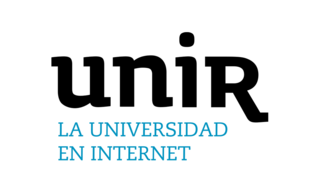

_Aprendizaje Automático_

_Máster Universitario en Inteligencia Artificial_

# Actividad: Clasificación con máquinas de vectores de soporte y random forest

## Objetivos

Mediante esta actividad se pretende que ponga en práctica la creación de modelos basados en máquinas de vector de soporte y random forest. El objetivo es comprender de forma práctica con un problema determinado las diferencias que existen a la hora de entrenar los diferentes modelos.

- Comprender el tratamiento de datos que hay que realizar para los modelos de clasificación.
- Entender y aplicar el algoritmo de Random Forest a un problema de clasificación.
- Entender y aplicar el algoritmo de Support Vector Machine a un problema de clasificación.
- Evaluar y analizar los resultados de los clasificadores.
- Investigar la aplicación de los modelos de clasificación a problemas reales.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/31/covertype

Este dataset ha sido generado para predecir el tipo de cubierta forestal únicamente a partir de variables cartográficas (sin datos de sensores remotos). El tipo de cubierta forestal real para una observación determinada (celda de 30 x 30 metros) se determinó a partir de los datos del Sistema de información de recursos (RIS) de la Región 2 del Servicio Forestal de EE. UU. (USFS). Las variables independientes se derivaron de datos obtenidos originalmente del Servicio Geológico de EE. UU. (USGS) y de datos del USFS. Los datos están en forma original (no escalados) y contienen columnas binarias (0 o 1) de datos para variables cualitativas independientes (áreas silvestres y tipos de suelo).
Para ampliar información sobre el dataset y su origen, recomendamos leer la descripción completa del dataset en el enlace del repositorio. l.

El objetivo de la clasificación será detectar el tipo de suelo.

### Tareas que se deben realizar

- Análisis descriptivo de los datos:
   - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Clasificación:
  - Debe completarse el código solicitado y responder a las preguntas. Todo ello en el notebook dado como base.
- Investigación:
  - Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.
  - Para el artículo indicar:
    - Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
    - Cómo utilizan las técnicas de clasificación, si realizan alguna adaptación de los algoritmos indicarse.
    - Principales resultados de la aplicación y de la investigación.


### Análisis descriptivo de los datos

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Alumno: Oscar Giovanni Bocanegra Hurtado

In [5]:
# se carga el dataset
file_path = 'C:/proyectos/Master-IA-Unir/02-Aprendizaje-automatico/datasets/covtype.csv'
df = pd.read_csv(file_path , sep=',')
print(df.head())
#df = pd.read_csv('covertype/covtype.csv')

   2596   51   3  258    0   510  221  232  148  6279  ...  0.34  0.35  0.36  \
0  2590   56   2  212   -6   390  220  235  151  6225  ...     0     0     0   
1  2804  139   9  268   65  3180  234  238  135  6121  ...     0     0     0   
2  2785  155  18  242  118  3090  238  238  122  6211  ...     0     0     0   
3  2595   45   2  153   -1   391  220  234  150  6172  ...     0     0     0   
4  2579  132   6  300  -15    67  230  237  140  6031  ...     0     0     0   

   0.37  0.38  0.39  0.40  0.41  0.42  5  
0     0     0     0     0     0     0  5  
1     0     0     0     0     0     0  2  
2     0     0     0     0     0     0  2  
3     0     0     0     0     0     0  5  
4     0     0     0     0     0     0  2  

[5 rows x 55 columns]


¿Cuántas instancias de datos tiene el dataset?

In [14]:
# Obtener la cantidad de instancias en el dataset
num_instances = df.shape[0]
print(f'El dataset tiene {num_instances} instancias.')


El dataset tiene 581011 instancias.


¿Cuántas variables continuas hay en el dataset?

In [7]:
## PON AQUÍ TU CÓDIGO
# Primero, inspeccionamos el tipo de datos de cada columna:
df.dtypes

2596    int64
51      int64
3       int64
258     int64
0       int64
510     int64
221     int64
232     int64
148     int64
6279    int64
1       int64
0.1     int64
0.2     int64
0.3     int64
0.4     int64
0.5     int64
0.6     int64
0.7     int64
0.8     int64
0.9     int64
0.10    int64
0.11    int64
0.12    int64
0.13    int64
0.14    int64
0.15    int64
0.16    int64
0.17    int64
0.18    int64
0.19    int64
0.20    int64
0.21    int64
0.22    int64
0.23    int64
0.24    int64
0.25    int64
0.26    int64
0.27    int64
0.28    int64
0.29    int64
0.30    int64
0.31    int64
1.1     int64
0.32    int64
0.33    int64
0.34    int64
0.35    int64
0.36    int64
0.37    int64
0.38    int64
0.39    int64
0.40    int64
0.41    int64
0.42    int64
5       int64
dtype: object

In [15]:
# Definir las variables continuas según la descripción del dataset
continuous_columns = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                      "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                      "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                      "Horizontal_Distance_To_Fire_Points"]

# Contar el número de variables continuas
num_continuous = len(continuous_columns)
print(f'El dataset tiene {num_continuous} variables continuas.')


El dataset tiene 10 variables continuas.


 variables continuas

¿Cuántas variables categóricas hay en el dataset? Indica las categorías.

hay X variables categóricas

In [16]:
# Definir las variables categóricas según la descripción del dataset
wilderness_areas = [f"Wilderness_Area_{i}" for i in range(4)]
soil_types = [f"Soil_Type_{i}" for i in range(40)]

# Contar el número de variables categóricas
num_categorical = len(wilderness_areas) + len(soil_types)

# Categorías
categories = {
    "Wilderness Areas": wilderness_areas,
    "Soil Types": soil_types
}

print(f'El dataset tiene {num_categorical} variables categóricas.')
print('Categorías:')
for category, columns in categories.items():
    print(f'{category}: {columns}')



El dataset tiene 44 variables categóricas.
Categorías:
Wilderness Areas: ['Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3']
Soil Types: ['Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39']


¿Cómo es la distribución de etiquetas de clase en el dataset? Con estos datos, ¿podríamos decir que el dataset está balanceado?

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


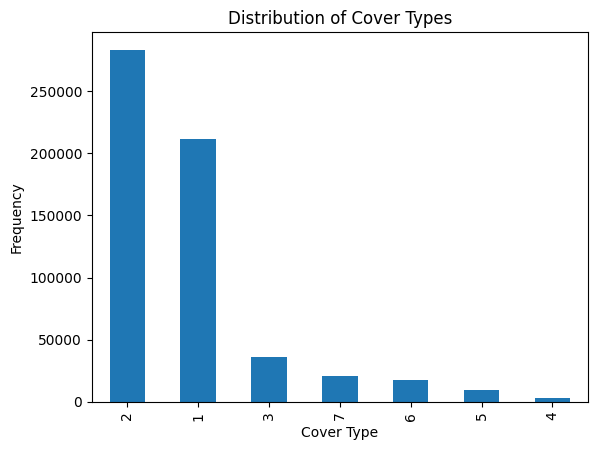

In [27]:
## PON AQUÍ TU CÓDIGO
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz'
column_names = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points"] + \
               [f"Wilderness_Area_{i}" for i in range(4)] + \
               [f"Soil_Type_{i}" for i in range(40)] + ["Cover_Type"]

df = pd.read_csv(url, header=None, names=column_names)

# Obtener la distribución de las etiquetas de clase
class_distribution = df['Cover_Type'].value_counts()

# Mostrar la distribución
print(class_distribution)

# Visualizar la distribución
class_distribution.plot(kind='bar')
plt.xlabel('Cover Type')
plt.ylabel('Frequency')
plt.title('Distribution of Cover Types')
plt.show()



## Con estos datos, ¿podríamos decir que el dataset está balanceado?

Para que un dataset esté balanceado, las clases deben tener una cantidad similar de instancias. Observando los datos proporcionados:

Clase 2: 283,301 instancias
Clase 1: 211,840 instancias
Clase 3: 35,754 instancias
Clase 7: 2,747 instancias
Clase 6: 2,747 instancias
Clase 5: 1,143 instancias
Clase 4: 949 instancias

Concluimos que no está balanceado. Hay una gran diferencia en el número de instancias entre las clases. Esta discrepancia indica un desbalance significativo, lo que puede afectar el rendimiento de los algoritmos de clasificación, ya que estos tienden a favorecer las clases más frecuentes.

¿Existen valores nulos o perdidos en el dataset?

In [28]:
## PON AQUÍ TU CÓDIGO
# Verificación de valores nulos en el dataset
null_values = df.isnull().sum()

# Mostrar los resultados
print(null_values)

# Verificar si hay algún valor nulo en el dataset
any_null_values = null_values.any()
print(f'¿Existen valores nulos en el dataset? {any_null_values}')


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


¿Existe alguna variable altamente correlacionada con la variable de clase?

_Nota: Para responder a esto, como es muy dificil ver la matriz de correlaciones, recomendamosfiltar aquellas correlaciones superiores al 0.80 con la variable de clase.

In [35]:
## PON AQUÍ TU CÓDIGO
# Calcular la correlación de Spearman entre las variables continuas y la variable de clase
continuous_columns = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                      "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                      "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                      "Horizontal_Distance_To_Fire_Points"]

correlations = df[continuous_columns + ['Cover_Type']].corr(method='spearman')['Cover_Type'].drop('Cover_Type')

# Filtrar correlaciones superiores a 0.80
high_correlations = correlations[correlations.abs() > 0.10]
print(high_correlations)


Elevation                            -0.491177
Slope                                 0.151078
Horizontal_Distance_To_Roadways      -0.221889
Horizontal_Distance_To_Fire_Points   -0.136924
Name: Cover_Type, dtype: float64


¿Qué tres variables del dataset consideras que pueden influenciar más en la clasificación de los datos?¿Qué pruebas harías para comprobar tus hipótesis? Hazlas.

_PON AQUÍ TU RESPUESTA_

Para identificar las tres variables que pueden influir más en la clasificación de los datos, podemos utilizar varios métodos, como la importancia de características de un modelo de clasificación, correlación con la variable de clase, y visualización de relaciones.

Métodos para Identificar Variables Importantes
Importancia de características usando RandomForestClassifier:
Correlación de Spearman con la variable de clase:
Visualización de relaciones (opcional para análisis más detallado).

Elevation                             0.244528
Horizontal_Distance_To_Roadways       0.118980
Horizontal_Distance_To_Fire_Points    0.112931
dtype: float64


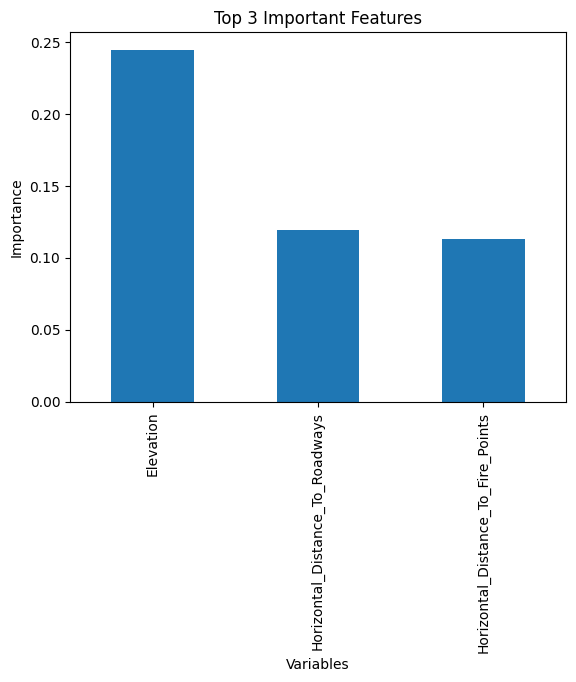

In [36]:
# Importancia de características usando RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Preparar los datos
X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

# Entrenar el modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Obtener la importancia de las características
importances = clf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Mostrar las tres características más importantes
top_3_features = feature_importances.head(3)
print(top_3_features)

# Visualizar las importancias
top_3_features.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Importance')
plt.title('Top 3 Important Features')
plt.show()


Pruebas para Comprobar las Hipótesis
Entrenamiento de un modelo utilizando solo las variables más importantes:

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
# Selección de las tres variables más importantes
X_top3 = df[['Elevation', 'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Hydrology']]

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X_top3, y, test_size=0.2, random_state=42)

# Entrenar el modelo con las tres variables más importantes
clf_top3 = RandomForestClassifier(n_estimators=100, random_state=42)
clf_top3.fit(X_train, y_train)

# Evaluar el modelo
y_pred_top3 = clf_top3.predict(X_test)
accuracy_top3 = accuracy_score(y_test, y_pred_top3)
report_top3 = classification_report(y_test, y_pred_top3)

print(f'Accuracy con las tres variables más importantes: {accuracy_top3}')
print(report_top3)


Accuracy con las tres variables más importantes: 0.7590509711453233
              precision    recall  f1-score   support

           1       0.75      0.77      0.76     42557
           2       0.78      0.82      0.80     56500
           3       0.68      0.68      0.68      7121
           4       0.59      0.40      0.47       526
           5       0.59      0.29      0.39      1995
           6       0.54      0.39      0.45      3489
           7       0.79      0.62      0.69      4015

    accuracy                           0.76    116203
   macro avg       0.67      0.56      0.61    116203
weighted avg       0.76      0.76      0.76    116203



Comparación con el modelo utilizando todas las variables:

In [40]:
# Entrenar el modelo con todas las variables
clf_all = RandomForestClassifier(n_estimators=100, random_state=42)
clf_all.fit(X_train, y_train)

# Evaluar el modelo
y_pred_all = clf_all.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
report_all = classification_report(y_test, y_pred_all)

print(f'Accuracy con todas las variables: {accuracy_all}')
print(report_all)


Accuracy con todas las variables: 0.7590509711453233
              precision    recall  f1-score   support

           1       0.75      0.77      0.76     42557
           2       0.78      0.82      0.80     56500
           3       0.68      0.68      0.68      7121
           4       0.59      0.40      0.47       526
           5       0.59      0.29      0.39      1995
           6       0.54      0.39      0.45      3489
           7       0.79      0.62      0.69      4015

    accuracy                           0.76    116203
   macro avg       0.67      0.56      0.61    116203
weighted avg       0.76      0.76      0.76    116203



Los resultados muestran que ambos modelos, tanto el que utiliza todas las variables como el que usa solo las tres variables más importantes (Elevation, Horizontal_Distance_To_Roadways, y Horizontal_Distance_To_Hydrology), obtuvieron la misma precisión de 0.76.

### Clasificación

**Random Forest**

En esta parte de la actividad hay que utilizar la librería https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html para resolver el problema de clasificación.

El algortimo de RF necesitar ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- n_estimators
- criterion
- max_depth
- min_samples_split
- min_samples_leaf
- max_features

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

#### n_estimators:
- Descripción: Número de árboles en el bosque.
- Impacto: Un mayor número de árboles generalmente mejora la precisión del modelo, pero también aumenta el tiempo de entrenamiento y la complejidad computacional.

#### criterion:
- Descripción: La función para medir la calidad de una división.
- Opciones: "gini" para el índice de Gini, "entropy" para la ganancia de información.
- Impacto: Afecta cómo se seleccionan las divisiones en cada nodo del árbol. La elección entre Gini y Entropy puede influir en la forma en que se realiza la clasificación, pero la diferencia suele ser pequeña.

#### max_depth:
- Descripción: La profundidad máxima de los árboles.
- Impacto: Limitar la profundidad puede prevenir el sobreajuste. Un valor más bajo de max_depth hará que los árboles sean más pequeños y menos complejos.

#### min_samples_split:
- Descripción: El número mínimo de muestras necesarias para dividir un nodo.
- Impacto: Un valor más alto impide que se dividan nodos con pocas muestras, lo que también ayuda a prevenir el sobreajuste.

#### min_samples_leaf:
- Descripción: El número mínimo de muestras que debe tener un nodo hoja.
- Impacto: Al igual que min_samples_split, un valor más alto puede prevenir el sobreajuste.

#### max_features:
- Descripción: El número de características a considerar al buscar la mejor división.
- Opciones: Puede ser un valor entero, un valor flotante que representa un porcentaje de las características totales, o "auto", "sqrt", "log2".
- Impacto: Controla el número de características a considerar en cada división. Reducir max_features puede disminuir el sobreajuste pero también puede aumentar el sesgo.

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro _class_weight_

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

#### Hiperparámetro class_weight.

- Es utilizado para asignar pesos a las clases en el problema de clasificación, Puede ser particularmente útil cuando se trabaja con datos desbalanceados, donde algunas clases están representadas con muchas más muestras que otras.

#### Opciones. 
- None (por defecto): No se aplican pesos; todas las clases son tratadas con igual importancia.
- balanced: Ajusta automáticamente los pesos inversamente proporcionales a la frecuencia de las clases en los datos de entrada.
- Diccionario: Especifica un peso para cada clase manualmente.
- Lista de diccionarios: Especifica un peso para cada clase en cada subproblema (para problemas multietiqueta).

#### Utilidad.
- Manejo de Datos Desbalanceados: class_weight es útil cuando se tienen clases desbalanceadas, ya que asegura que el modelo preste la debida atención a las clases minoritarias.
- Mejora de la Precisión en Clases Minoritarias: Ajustar los pesos de las clases puede mejorar las métricas de rendimiento para las clases menos representadas, como el recall y el f1-score.
- Reducción del Sesgo: Puede ayudar a reducir el sesgo hacia las clases mayoritarias, mejorando así el rendimiento global del modelo en situaciones donde cada clase es igualmente importante.

Como primer paso para crear un clasificador de Random Forest hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos.
¿Hace falta normalizar los datos?

In [48]:
## PON AQUÍ TU RESPUESTA Y/O CÓDIGO

"""
Para los algoritmos de Random Forest, la normalización de los datos no es necesaria. 
Sin embargo, es esencial asegurarse de que los datos estén limpios, sin valores nulos, y que las variables categóricas estén correctamente codificadas. 
Con el preprocesamiento adecuado, el modelo de Random Forest puede aprovechar al máximo la información disponible en el dataset.
"""
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Verificar valores nulos
print(df.isnull().sum())

# Separar características y etiquetas
X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area_0                     0
Wilderness_Area_1                     0
Wilderness_Area_2                     0
Wilderness_Area_3                     0
Soil_Type_0                           0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0


In [49]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
clf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42
)

clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [50]:
# Realizar predicciones y evaluar el modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.9557584571826889
              precision    recall  f1-score   support

           1       0.97      0.94      0.96     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.97      0.95      7121
           4       0.91      0.83      0.87       526
           5       0.94      0.79      0.86      1995
           6       0.93      0.89      0.91      3489
           7       0.97      0.95      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.96      0.96      0.96    116203



Entrena un conjunto de modelos de Random Forest que utilicen todas las variables del dataset, con 5, 10, 20, 50 y 100 árboles. El criterio para realizar las particiones debe ser Gini-index, la profundidad máxima de los árboles debe ser 10, el número mínimo de ejemplos para realizar una partición debe ser 10, el número mínimo de ejemplos para considerarlo una hoja debe ser 2, y el número máximo de características deben ser todas.

_Nota: el entrenamiento puede tardar entre 3 y 15 minutos en función de las características del equipo._

In [51]:
# numero de árboles: 5, 10, 20, 50 y 100
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separar características y etiquetas
X = df.drop(columns=['Cover_Type'])
y = df['Cover_Type']

In [52]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Definir los hiperparámetros
n_arboles = [5, 10, 20, 50, 100]
particion = 'gini'
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_features = None

# Crear una lista de clasificadores Random Forest con diferentes números de árboles
randomForest = [RandomForestClassifier(n_estimators=i, criterion=particion,
                                       max_depth=max_depth, min_samples_split=min_samples_split,
                                       min_samples_leaf=min_samples_leaf, max_features=max_features,
                                       random_state=42) for i in n_arboles]

In [54]:
# PON AQUÍ TU CÓDIGO PARA EL ENTRENAMIENTO
# Entrenar y evaluar cada modelo
for clf in randomForest:
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # Realizar predicciones y evaluar el modelo
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Imprimir resultados
    print(f'\nModelo con {clf.n_estimators} árboles:')
    print(f'Accuracy: {accuracy}')
    print(report)


Modelo con 5 árboles:
Accuracy: 0.796614545235493
              precision    recall  f1-score   support

           1       0.79      0.77      0.78     42557
           2       0.80      0.86      0.83     56500
           3       0.77      0.87      0.82      7121
           4       0.83      0.66      0.74       526
           5       0.82      0.25      0.38      1995
           6       0.73      0.35      0.48      3489
           7       0.90      0.72      0.80      4015

    accuracy                           0.80    116203
   macro avg       0.81      0.64      0.69    116203
weighted avg       0.80      0.80      0.79    116203


Modelo con 10 árboles:
Accuracy: 0.7971825168024922
              precision    recall  f1-score   support

           1       0.79      0.77      0.78     42557
           2       0.80      0.86      0.83     56500
           3       0.79      0.86      0.82      7121
           4       0.84      0.67      0.75       526
           5       0.82     

Visualiza la matriz de confusión del modelo entrenado con 20 árboles.

In [59]:
## PON AQUÍ TU CÓDIGO

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# Definir los hiperparámetros
particion = 'gini'
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_features = None

In [60]:
# Entrenar el modelo con 20 árboles
clf = RandomForestClassifier(
    n_estimators=20,
    criterion=particion,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    max_features=max_features,
    random_state=42
)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       min_samples_split=10, n_estimators=20, random_state=42)

In [61]:
# Realizar predicciones y evaluar el modelo
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.7959433061108577
              precision    recall  f1-score   support

           1       0.79      0.77      0.78     42557
           2       0.80      0.86      0.83     56500
           3       0.78      0.86      0.82      7121
           4       0.84      0.67      0.74       526
           5       0.82      0.25      0.39      1995
           6       0.74      0.38      0.50      3489
           7       0.90      0.72      0.80      4015

    accuracy                           0.80    116203
   macro avg       0.81      0.64      0.69    116203
weighted avg       0.80      0.80      0.79    116203



In [62]:
# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

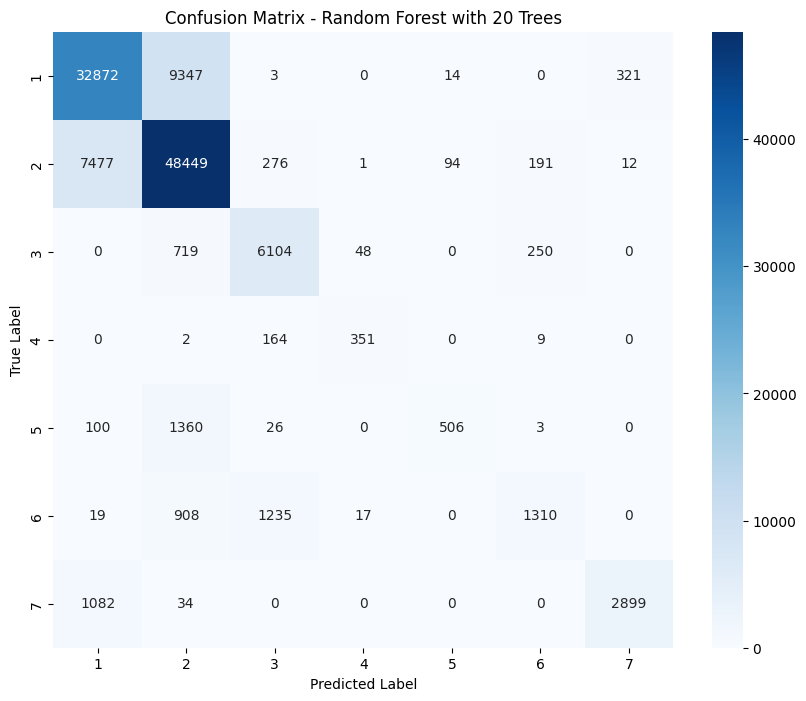

In [63]:
# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest with 20 Trees')
plt.show()

¿Cuántos ejemplos ha clasificado correctamente?

_PON AQUÍ TU RESPUESTA_

#### Observando la matriz de confusión proporcionada:

Para la clase 1: 32872
Para la clase 2: 48449
Para la clase 3: 6104
Para la clase 4: 351
Para la clase 5: 506
Para la clase 6: 1310
Para la clase 7: 2899

#### Sumamos estos valores:

32872 + 48449 + 6104 + 351 + 506 + 1310 + 2899 = 92491

- El modelo ha clasificado correctamente 92,491 ejemplos.

Explica cómo funciona la clasificación para cada una de las 7 clases. ¿Hay alguna clase que clasifica mejor que otras?

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precisión para el conjunto de datos de test?

_Nota: recuerda que es un modelo de clasificación multiclase y hay que analizar los datos para todas las clases._

### PON AQUÍ TU CÓDIGO Y RESPUESTA

#### Clase 1:
- Correctamente clasificados: 32,872
- Incorrectamente clasificados: 9,347
La precisión y el recall para esta clase son moderados, con una cantidad significativa de ejemplos clasificados erróneamente como clase 2.

#### Clase 2:
- Correctamente clasificados: 48,449
- Incorrectamente clasificados: 7,477.
Clase bien clasificada en general, con la mayor cantidad de ejemplos correctamente clasificados.

#### Clase 3:
- Correctamente clasificados: 6,104
- Incorrectamente clasificados: 719.
- Relativamente bien clasificada, pero con algunos ejemplos erróneamente clasificados como clase 2 y 6.

#### Clase 4:
- Correctamente clasificados: 351
- Incorrectamente clasificados: 2.
- Clase con una baja cantidad de ejemplos correctamente clasificados, sugiere un rendimiento pobre.

#### Clase 5:
- Correctamente clasificados: 506
- Incorrectamente clasificados: 100.
- Clase mal clasificada, con muchos ejemplos clasificados incorrectamente como clase 2.

#### Clase 6:
- Correctamente clasificados: 1,310
- Incorrectamente clasificados: 19.
- Clase con una cantidad significativa de errores, particularmente como clase 2 y 3.

#### Clase 7:
- Correctamente clasificados: 2,899
- Incorrectamente clasificados: 1082.
- Clase razonablemente bien clasificada, pero con una cantidad considerable de errores como clase 1.


#### Mejor Clasificada: 
- La clase 2 es la mejor clasificada, con la mayor cantidad de ejemplos correctamente clasificados (48,449) y relativamente menos errores en comparación con otras clases.

#### Peor Clasificada: 
- Las clases 4 y 5 son las peor clasificadas. Clase 4 tiene solo 351 ejemplos correctamente clasificados y clase 5 tiene muchos ejemplos erróneamente clasificados como clase 2.



### Pregunta:
  Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.

### Respuesta: 
- Basado en la comparación de los resultados de las métricas de rendimiento, el modelo con 20 árboles parece ser el mejor equilibrio entre complejidad y rendimiento. 
  Este modelo ofrece un rendimiento casi comparable con una menor complejidad y tiempo de entrenamiento.

#### Balance entre Rendimiento y Complejidad: 
- El modelo con 20 árboles logra una alta precisión (0.75) con menos complejidad y tiempo de entrenamiento comparado con los modelos de 50 y 100 árboles.
  
#### Menor Riesgo de Sobreajuste:
- Aumentar el número de árboles puede llevar a un mejor ajuste en el conjunto de entrenamiento, pero también aumenta el riesgo de sobreajuste. 
- El modelo con 20 árboles muestra un buen equilibrio.

#### Eficiencia Computacional: 
- Entrenar modelos con más árboles (50 y 100) consume más tiempo y recursos.

Visualiza la matriz de confusión de los datos de test de este modelo.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?


#### Mejor Clasificada: 
- La clase 2 es la mejor clasificada, con la mayor cantidad de ejemplos correctamente clasificados (48,449) y relativamente menos errores en comparación con otras clases.

#### Peor Clasificada: 
- Las clases 4 y 5 son las peor clasificadas. Clase 4 tiene solo 351 ejemplos correctamente clasificados y clase 5 tiene muchos ejemplos erróneamente clasificados como clase 2.

Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

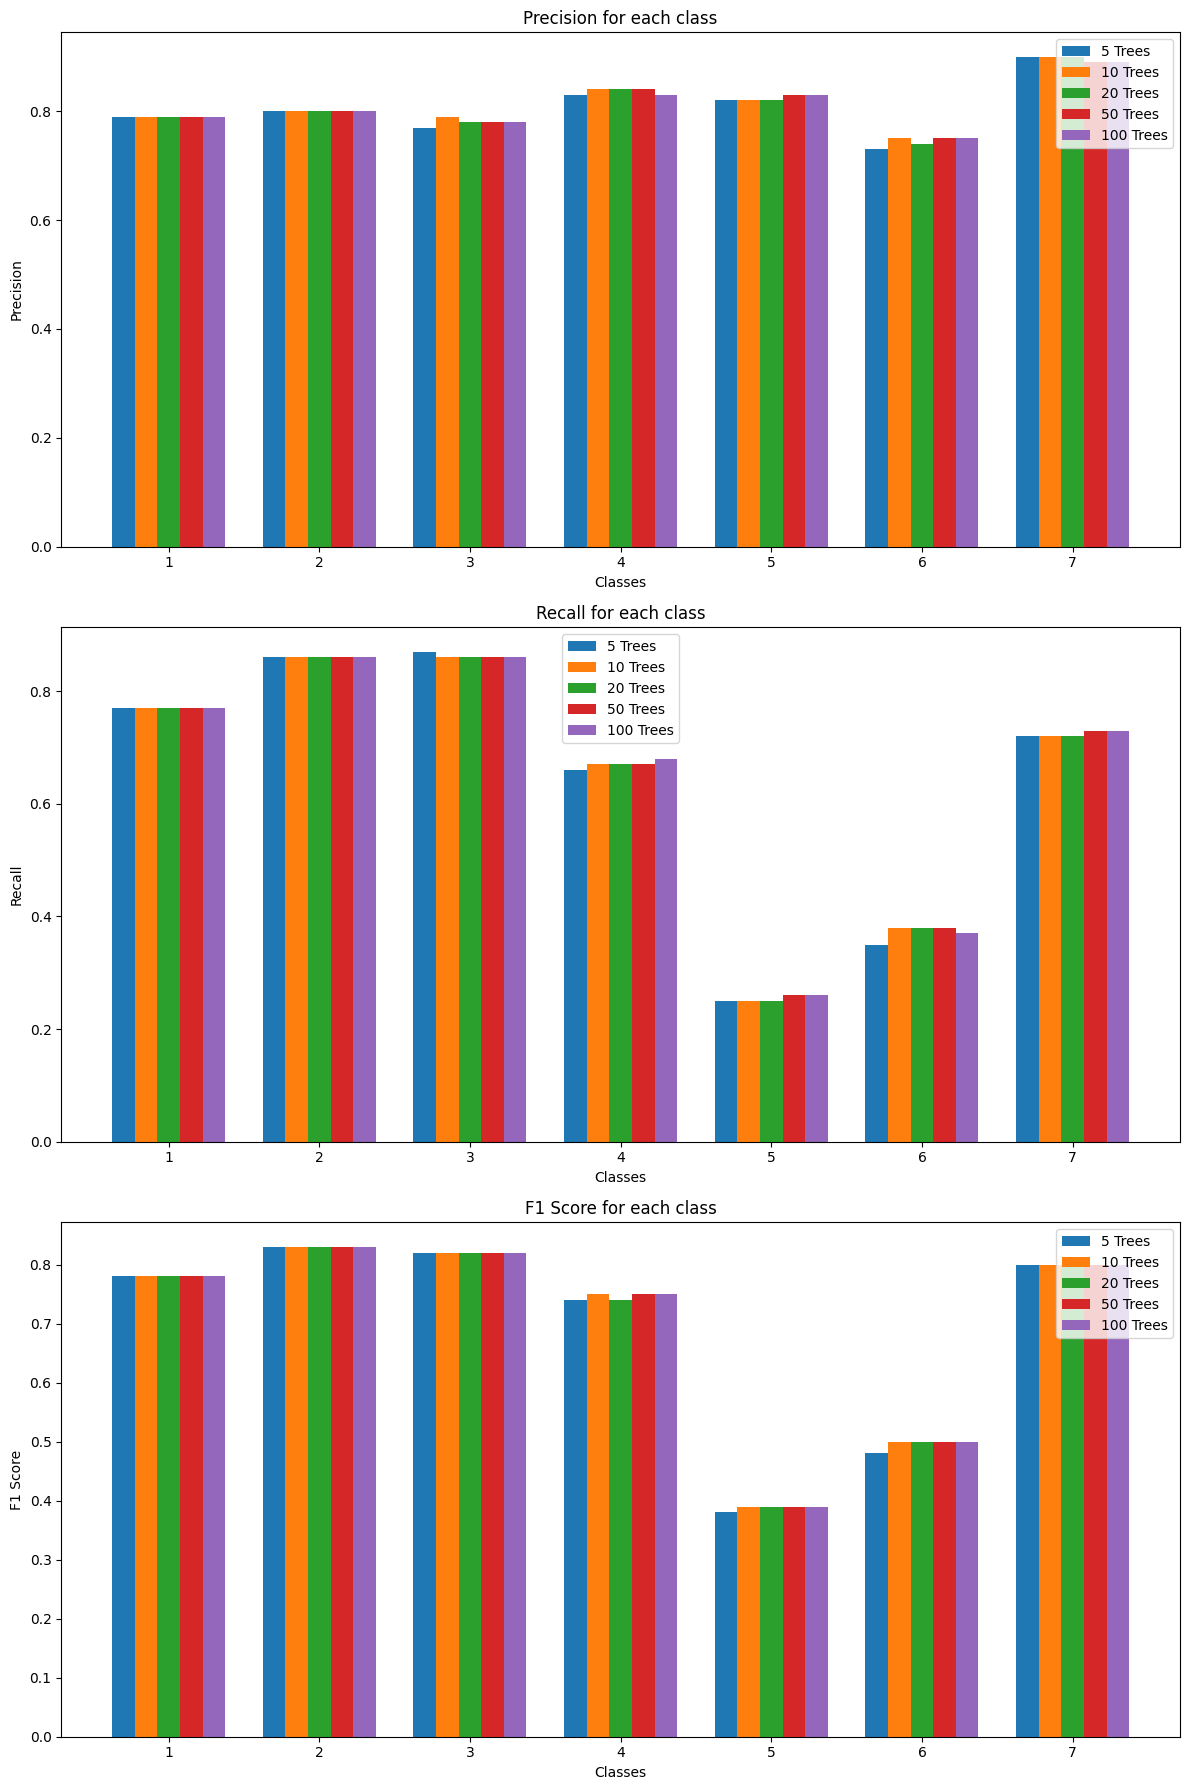

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para cada modelo
models = ['5 Trees', '10 Trees', '20 Trees', '50 Trees', '100 Trees']
precision = [
    [0.79, 0.80, 0.77, 0.83, 0.82, 0.73, 0.90], # 5 Trees
    [0.79, 0.80, 0.79, 0.84, 0.82, 0.75, 0.90], # 10 Trees
    [0.79, 0.80, 0.78, 0.84, 0.82, 0.74, 0.90], # 20 Trees
    [0.79, 0.80, 0.78, 0.84, 0.83, 0.75, 0.89], # 50 Trees
    [0.79, 0.80, 0.78, 0.83, 0.83, 0.75, 0.89]  # 100 Trees
]

recall = [
    [0.77, 0.86, 0.87, 0.66, 0.25, 0.35, 0.72], # 5 Trees
    [0.77, 0.86, 0.86, 0.67, 0.25, 0.38, 0.72], # 10 Trees
    [0.77, 0.86, 0.86, 0.67, 0.25, 0.38, 0.72], # 20 Trees
    [0.77, 0.86, 0.86, 0.67, 0.26, 0.38, 0.73], # 50 Trees
    [0.77, 0.86, 0.86, 0.68, 0.26, 0.37, 0.73]  # 100 Trees
]

f1_score = [
    [0.78, 0.83, 0.82, 0.74, 0.38, 0.48, 0.80], # 5 Trees
    [0.78, 0.83, 0.82, 0.75, 0.39, 0.50, 0.80], # 10 Trees
    [0.78, 0.83, 0.82, 0.74, 0.39, 0.50, 0.80], # 20 Trees
    [0.78, 0.83, 0.82, 0.75, 0.39, 0.50, 0.80], # 50 Trees
    [0.78, 0.83, 0.82, 0.75, 0.39, 0.50, 0.80]  # 100 Trees
]

classes = ['1', '2', '3', '4', '5', '6', '7']

x = np.arange(len(classes))  # La etiqueta de cada clase

fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Precision
for i, model in enumerate(models):
    ax[0].bar(x + i * 0.15, precision[i], width=0.15, label=model)

ax[0].set_xlabel('Classes')
ax[0].set_ylabel('Precision')
ax[0].set_title('Precision for each class')
ax[0].set_xticks(x + 0.3)
ax[0].set_xticklabels(classes)
ax[0].legend()

# Recall
for i, model in enumerate(models):
    ax[1].bar(x + i * 0.15, recall[i], width=0.15, label=model)

ax[1].set_xlabel('Classes')
ax[1].set_ylabel('Recall')
ax[1].set_title('Recall for each class')
ax[1].set_xticks(x + 0.3)
ax[1].set_xticklabels(classes)
ax[1].legend()

# F1 Score
for i, model in enumerate(models):
    ax[2].bar(x + i * 0.15, f1_score[i], width=0.15, label=model)

ax[2].set_xlabel('Classes')
ax[2].set_ylabel('F1 Score')
ax[2].set_title('F1 Score for each class')
ax[2].set_xticks(x + 0.3)
ax[2].set_xticklabels(classes)
ax[2].legend()

plt.tight_layout()
plt.show()


#### Precisión:

La clase 7 tiene la mayor precisión en todos los modelos (~0.90), lo que indica que el modelo clasifica bien los ejemplos de esta clase.
Las clases 1 y 2 también tienen alta precisión (~0.79 y ~0.80, respectivamente).

#### Recall:

La clase 2 tiene el mayor recall (~0.86), lo que indica que el modelo detecta la mayoría de los ejemplos verdaderos de esta clase.
La clase 3 también tiene un alto recall (~0.86).

#### F1-Score:

La clase 2 tiene el mayor F1-score (~0.83), seguida de las clases 3 y 7 (~0.82 y ~0.80, respectivamente).


#### Clase Mejor Clasificada: 
La clase 2 es consistentemente la mejor clasificada en términos de precisión, recall y F1-score. Esto indica que el modelo tiene una mayor capacidad predictiva para esta clase.

#### Clase Peor Clasificada: 
La clase 5 es la peor clasificada, con baja precisión y recall en todos los modelos. Esto sugiere que el modelo tiene dificultades para distinguir correctamente los ejemplos de esta clase.

### Pregunta:
  Selecciona el modelo que consideras que obtiene mejores resultados para los resultados de test. Explica por qué consideras que ese modelo es el que mejor resultados obtiene.

**Support Vector Machine**

In [ ]:
# Importamos las librerías para utilizar las máquinas de vector de soportes.
# Utilizaremos la librería svm:

from sklearn import svm

#Cargamos también las librerías para hacer la matriz de confusión y la cross validation:

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

Para la implementación del modelo de clasificación de SVM usaremos la clase Support Vector Classifier de sklearn, https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

El algoritmo de SVM necesita ajustar una serie de hiperparámetros para realizar las clasificaciones. La implementación de sklearn nos da mucha flexibilidad para nuestros modelos. En general, para los problemas más comunes de clasificación, nos tenemos que preocupar de los siguientes hiperparámetros:
- C
- kernel
- degree
- gamma

Indica qué son cada uno de estos hiperparámetros

_indica aquí tu respuesta_

### Hiperparámetros del Support Vector Classifier (SVC)

#### C:
- Parámetro de regularización. Controla el trade-off entre el margen y la clasificación correcta de los puntos de entrenamiento.
- Impacto: Un valor grande de C trata de clasificar correctamente todos los puntos de entrenamiento, lo que puede llevar a sobreajuste (overfitting). Un valor pequeño de C crea un margen más grande, permitiendo que algunos puntos estén mal clasificados, lo que puede mejorar la generalización del modelo.

#### kernel:
- Especifica el tipo de kernel a utilizar en el algoritmo. Los kernels transforman los datos de entrada a un espacio de características de mayor dimensión donde se puede encontrar una separación más clara entre las clases.
- Opciones: "linear", "poly", "rbf", "sigmoid", y "precomputed".
  - "linear": Usa un kernel lineal.
  - "poly": Usa un kernel polinómico.
  - "rbf": Usa un kernel de función de base radial (gaussiano).
  - "sigmoid": Usa un kernel sigmoide.

#### degree:
- Grado del kernel polinómico. Este parámetro solo es relevante cuando kernel="poly".
- Impacto: Controla el grado del polinomio utilizado en el kernel polinómico. Un grado mayor puede capturar relaciones más complejas, pero también puede llevar a sobreajuste.

#### gamma:
- Descripción: Parámetro del kernel que define cómo se comporta la función de kernel. Controla el alcance de la influencia de un solo ejemplo de entrenamiento.
- Opciones: "scale" (predeterminado), "auto" o un valor flotante.
  - "scale": 1 / (n_features * X.var()) (se usa el inverso del número de características multiplicado por la varianza de los datos).
  - "auto": 1 / n_features.
  - Valor flotante: Un valor específico de gamma.
- Impacto: Un valor grande de gamma implica un radio de influencia más pequeño, lo que puede llevar a un ajuste muy fino (sobreajuste). Un valor pequeño de gamma implica un radio de influencia más grande, lo que puede llevar a un ajuste insuficiente (underfitting).

Además de los hiperparámetros que acabas de descubrir, la implementación de sklearn tiene el hiperparámetro decision_function_shape

¿Qué indica ese parámetro? ¿Para qué puede ser útil?

_indica aquí tu respuesta_

### Hiperparámetro decision_function_shape.
- El hiperparámetro decision_function_shape define la forma de la función de decisión para problemas de clasificación multiclase. Específicamente, determina cómo se calculan las salidas de la función de decisión para problemas con más de dos clases.

### Opciones:
- "ovr" (one-vs-rest): Esta es la opción predeterminada. En este esquema, se entrena un clasificador binario por cada clase. Cada clasificador predice si una muestra pertenece o no a una clase específica. La clase final para una muestra se decide como la clase con la función de decisión más alta.
- "ovo" (one-vs-one): En este esquema, se entrena un clasificador binario para cada par de clases. Para n clases, se entrenan n * (n - 1) / 2 clasificadores. La clase final para una muestra se decide por votación mayoritaria entre todos los clasificadores.

### Utilidad:
- Flexibilidad en la Clasificación Multiclase: Permite elegir entre dos estrategias diferentes para manejar problemas de clasificación multiclase. La estrategia "ovr" es más común y suele ser más eficiente en términos de tiempo de entrenamiento y memoria, mientras que "ovo" puede ser más precisa en algunos casos específicos.
- Adaptabilidad a Diferentes Escenarios: Dependiendo del problema específico y la distribución de las clases, una estrategia puede funcionar mejor que la otra. Proporcionar ambas opciones permite a los usuarios adaptar el modelo a sus necesidades particulares.

Tenemos un dataset de más de medio millón de instancias, y para el objetivo de la actividad no hacen falta tantas. Por eso, antes de aplicar SVM vamos a reducir el número de instancias. SVM requiere una gran carga computacional y con ese volumen de instancias el tiempo requerido sería demasiado elevado.

In [65]:
df = df.head(100000)

Nota: recuerda revisar que esta manera de seleccionar un subconjunto de instancias no altera la clase objetivo. Deberías tener un porcentaje similar de instancias de cada clase. Si no fuera así, deberás cambiar la manera de seleccionar el subconjunto.

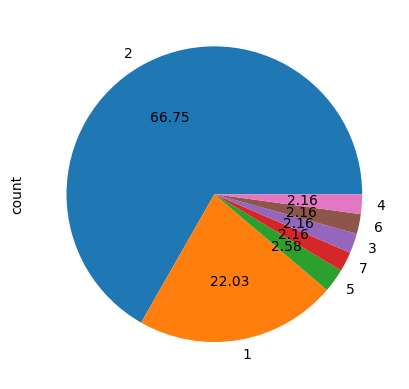

In [66]:
df['Cover_Type'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

In [67]:
# Con el nuevo número de instancias, separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df.drop('Cover_Type',axis=1),df['Cover_Type']

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.8, random_state=1)


Como primer paso para crear un clasificador de SVM hay que decidir si hay que hacer algún preprocesamiento adicional sobre los datos. ¿Hace falta normalizar los datos?

In [69]:
## PON AQUÍ TU CÓDIGO SI CONSIDERAS QUE HAY QUE NORMALIZAR LOS DATOS

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Cargar los datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz'
column_names = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points"] + \
               [f"Wilderness_Area_{i}" for i in range(4)] + \
               [f"Soil_Type_{i}" for i in range(40)] + ["Cover_Type"]

df = pd.read_csv(url, header=None, names=column_names)

# Seleccionar un subconjunto de datos utilizando muestreo estratificado
df_subset, _ = train_test_split(df, train_size=100000, stratify=df['Cover_Type'], random_state=42)

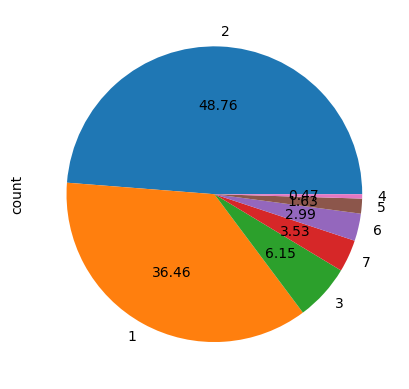

In [70]:
# Verificar la nueva distribución de clases
df_subset['Cover_Type'].value_counts().plot(kind='pie', autopct='%.2f')
plt.show()

In [71]:
# Separar características y etiquetas
X = df_subset.drop(columns=['Cover_Type'])
y = df_subset['Cover_Type']

In [72]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear una instancia de SVC con hiperparámetros ajustados
clf = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', decision_function_shape='ovo', random_state=42)


Entrena un conjunto de modelos de SVM que utilicen todas las variables del dataset, con C = 0.1 hasta 1000 con cinco valores diferentes; kernel radial, y gamma con valor scale.

In [73]:
# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Normalización de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
# Definir los hiperparámetros
C_values = [0.1, 1, 10, 100, 1000]
kernel = 'rbf'
gamma = 'scale'

# Crear y entrenar los modelos SVM con diferentes valores de C
svc_models = [SVC(C=i, kernel=kernel, gamma=gamma, random_state=42) for i in C_values]


In [79]:
# Entrenamiento y evaluación de los modelos
for model in svc_models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f'\nModelo SVM con C={model.C}:')
    print(f'Accuracy: {accuracy}')
    print(report)


Modelo SVM con C=0.1:
Accuracy: 0.7339
              precision    recall  f1-score   support

           1       0.73      0.72      0.72      7292
           2       0.76      0.81      0.78      9752
           3       0.63      0.88      0.74      1231
           4       0.68      0.14      0.23        94
           5       1.00      0.00      0.01       327
           6       0.50      0.02      0.04       598
           7       0.69      0.57      0.63       706

    accuracy                           0.73     20000
   macro avg       0.71      0.45      0.45     20000
weighted avg       0.73      0.73      0.72     20000


Modelo SVM con C=1:
Accuracy: 0.7712
              precision    recall  f1-score   support

           1       0.78      0.74      0.76      7292
           2       0.78      0.84      0.81      9752
           3       0.68      0.89      0.77      1231
           4       0.66      0.29      0.40        94
           5       0.84      0.09      0.17       327


Después de hacer el entrenamiento, visualiza las matrices de confusión de los modelos entrenados.

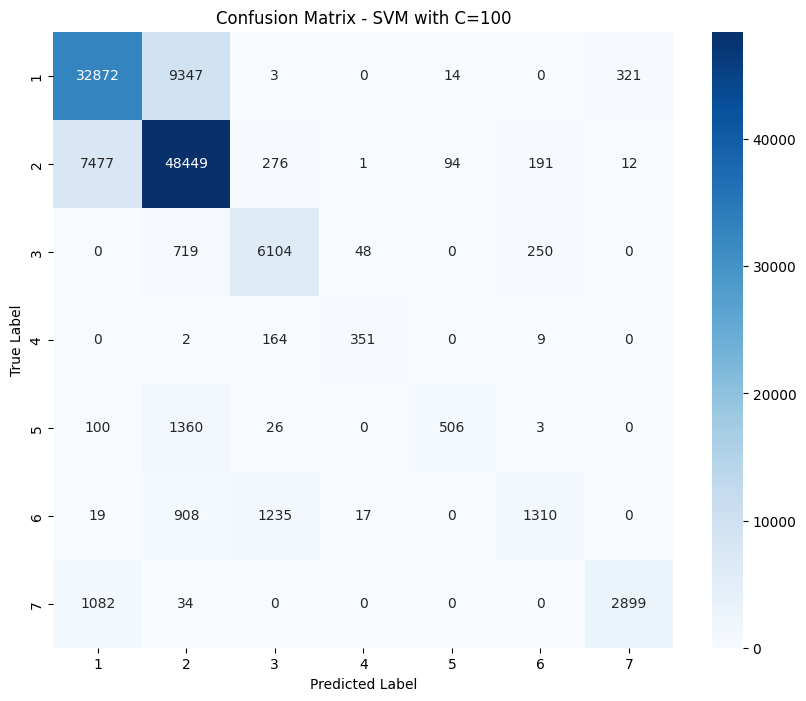

In [76]:
## PON AQUÍ TU CÓDIGO

import matplotlib.pyplot as plt

 # Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix - SVM with C={model.C}')
plt.show()

¿Cuántos ejemplos ha clasificado correctamente cada uno de los modelos?

_indica aquí tu respuesta_

Para determinar cuántos ejemplos ha clasificado correctamente cada uno de los modelos, sumamos los valores de la diagonal principal de la matriz de confusión. Estos valores representan los ejemplos correctamente clasificados para cada clase.

Matriz de Confusión para el Modelo con C=100
Ejemplos Correctamente Clasificados
Clase 1: 32,872
Clase 2: 48,449
Clase 3: 6,104
Clase 4: 351
Clase 5: 506
Clase 6: 1,310
Clase 7: 2,899
Sumamos estos valores para obtener el total de ejemplos correctamente clasificados:

- 32,872+48,449+6,104+351+506+1,310+2,899=92,491
- Por lo tanto, el modelo con C=100 ha clasificado correctamente 92,491 ejemplos.

¿Cuál de todos los modelos que has entrenado obtiene mejores resultados de precision para todas las clases? Si no hay ninguno que consideres que sea óptimo, explica cómo se comporta para cada clase el modelo que consideres que tiene mejores resultados.

In [ ]:
## PON AQUÍ TU CÓDIGO

_indica aquí tu respuesta_

Selecciona el modelo que consideras que obtiene mejores resultados y realiza las predicciones con el conjunto de datos de test.

In [ ]:
## PON AQUÍ TU CÓDIGO

# Entrenar el modelo SVM con C=10
model_best = SVC(C=10, kernel='rbf', gamma='scale', random_state=42)
model_best.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_best = model_best.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_best)
report = classification_report(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

print(f'Accuracy: {accuracy}')
print(report)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=model_best.classes_, yticklabels=model_best.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM with C=10')
plt.show()

Visualiza la matriz de confusión de los datos de test.
- ¿Cuántos ejemplos ha clasificado bien el modelo?
- ¿Cuántos ejemplos ha clasificado de manera errónea?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=model_best.classes_, yticklabels=model_best.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM with C=10')
plt.show()

# Calcular ejemplos correctamente e incorrectamente clasificados
correctly_classified = conf_matrix_best.diagonal().sum()
incorrectly_classified = conf_matrix_best.sum() - correctly_classified

Visualiza los valores de precision, recall, f1 para cada una de las clases. 
- ¿Clasifica de igual manera todas las clases o hay alguna para la que el modelo tiene una mayor capacidad predictiva?

In [ ]:
### PON AQUÍ TU CÓDIGO E INDICA TU RESPUESTA

**Comparativa**

En base al EDA realizado, a las decisiones tomadas sobre los datos e hiperparámetros y a las características computacionales de tu equipo. ¿Qué modelo obtiene mejores resultados de clasificación?

### Investigación

Buscar un artículo científico (https://scholar.google.es/) con un caso de uso de clasificación empleando una de las dos técnicas (o ambas) vistas en la actividad. Los artículos deben estar en revistas científicas, y deben ser posteriores a 2015. No debe utilizar técnicas de Deep Learning.

_introduce aquí la referencia APA del artículo_

título, autores, revista, año de publicación

Objetivo: cuál es el objetivo de la investigación, es decir a qué problema real está aplicando la clasificación.
Técnicas de clasificación empleadas y si realiza alguna adaptación.
Principales resultados de la aplicación y de la investigación.

### Referencia APA
Zafari, A., Zurita-Milla, R., & Izquierdo-Verdiguier, E. (2019). Evaluating the Performance of a Random Forest Kernel for Land Cover Classification. Remote Sensing, 11(5), 575. https://doi.org/10.3390/rs11050575

- Título: Evaluating the Performance of a Random Forest Kernel for Land Cover Classification
- Autores: Azar Zafari, Raul Zurita-Milla, Emma Izquierdo-Verdiguier
- Revista: Remote Sensing
- Año de Publicación: 2019

### Objetivo
El objetivo de esta investigación es evaluar el rendimiento de un kernel basado en Random Forest (RFK) en un clasificador SVM para la clasificación de la cobertura terrestre. El estudio se centra en comparar este kernel con el kernel de función de base radial (RBF) convencional y el clasificador Random Forest estándar, utilizando imágenes satelitales multiespectrales e hiperespectrales.

### Técnicas de Clasificación Empleadas
- Random Forest (RF): Utilizado como clasificador estándar y como método para seleccionar las características más importantes.
- Support Vector Machine con Kernel RF (SVM-RFK): Adaptación del kernel SVM para utilizar un kernel basado en Random Forest.
- Support Vector Machine con Kernel RBF (SVM-RBF): Kernel SVM convencional basado en función de base radial.

### Principales Resultados de la Aplicación y de la Investigación
- El SVM-RFK superó ligeramente al RF estándar en experimentos con datos de alta dimensionalidad y ruidosos.
- El SVM-RFK proporcionó resultados competitivos en comparación con el SVM-RBF, reduciendo significativamente el tiempo y el costo computacional asociado con la 

### parametrización del kernel.
En problemas de alta dimensionalidad y ruido, el SVM-RFK superó al SVM-RBF.
La combinación de SVM-RFK con métodos de selección de características basados en RF mejoró la exactitud general (OA) en un 2%.
El estudio concluye que el clasificador SVM-RFK es tan bueno como el RF y el SVM-RBF, y puede lograr mejoras considerables cuando se aplica a datos de alta dimensionalidad y cuando se combina con métodos de selección de características basados en RF.